<h2>BIAS DETECTION IN TWEETS TOWARDS HIJAB IN FRANCE VS IRAN</h2>

In [1]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\imaaz\appdata\local\temp\pip-req-build-3v5r43mo
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 46a603053cfbc0ce3c54d43d7e1ac2427fa82b4d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\imaaz\AppData\Local\Temp\pip-req-build-3v5r43mo'

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install snscrape


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install keras-preprocessing==1.0.6

     ---------------------------------------- 59.1/59.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires keras-preprocessing>=1.1.1, but you have keras-preprocessing 1.0.6 which is incompatible.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install keras.layers.recurrent

ERROR: Could not find a version that satisfies the requirement keras.layers.recurrent (from versions: none)
ERROR: No matching distribution found for keras.layers.recurrent

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from tensorflow.keras.layers import Activation, Dense

In [7]:
!pip install tensorflow==2.2.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2)
ERROR: No matching distribution found for tensorflow==2.2.0

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install torch

     -------------------------------------- 167.3/167.3 MB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import nltk 
import sys
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from collections import Counter
#from keras.layers.recurrent import LSTM

import torch
from torch.utils.data import DataLoader, TensorDataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

c:\Users\imaaz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imaaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imaaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imaaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imaaz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imaaz\AppData\Roaming\nl

True

**No need to run next 2 cells. They are used for inital tweet scraping using snscraper**

**Next 3 cells after those are for creating dataframes and storing into CSV Files**

In [ ]:
#Scraping Tweets for France Dataset

maxTweets = 50000

# Creating list to append tweet data to
france_tweets = []


for i,tweet in enumerate(sntwitter.TwitterSearchScraper('hijab OR #hijab OR hijabi OR #hijabi OR #hijabban AND (France OR french OR #france OR #french) since:2021-01-01 until:2022-11-03 lang:en').get_items()):
    # print(i)
    if i > maxTweets:
        break
    france_tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

In [ ]:
#Scraping Tweets for france Dataset
maxTweets = 50000

# Creating list to append tweet data to
iran_tweets = []


for i,tweet in enumerate(sntwitter.TwitterSearchScraper('hijab OR #hijab OR hijabi OR #hijabi OR #hijabban  AND (iran OR irani OR #iran OR #irani) since:2021-01-01 until:2022-11-03 lang:en').get_items()):
    # print(i)
    if i > maxTweets:
        break
    iran_tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    


In [ ]:
# Creating a dataframe from the tweets list above
france_tweets_df = pd.DataFrame(france_tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

# Display first 5 entries from dataframe
france_tweets_df.head()

In [ ]:
# Creating a dataframe from the tweets list above
iran_tweets_df = pd.DataFrame(iran_tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

# Display first 5 entries from dataframe
iran_tweets_df.head()

In [ ]:
# Export France Dataframe into a CSV
france_tweets_df.to_csv('france-tweets.csv', sep=',', index=False)

# Export Iran Dataframe into a CSV
iran_tweets_df.to_csv('iran-tweets.csv', sep=',', index=False)

**Read Tweets from CSV Files and store in DataFrames**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# france_tweets_df = pd.read_csv('/content/drive/My Drive/PDS_Final/france-tweets.csv',lineterminator='\n')
# iran_tweets_df = pd.read_csv('/content/drive/My Drive/PDS_Final/iran-tweets.csv')

france_tweets_df = pd.read_csv('france-tweets.csv',lineterminator='\n')
iran_tweets_df = pd.read_csv('iran-tweets.csv')

**Here we use NLTK's SentimentIntensityAnalyzer to get the polarity score for each tweet**

In [13]:
#Sentiment Analysis

def assign_label(tweet):

    result = 0
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    if neg > pos:
        result = 0
    elif pos > neg:
        result = 1
    elif pos == neg:
        result = -1
        
    return result

**Using assign_label to assign a label to each tweet based on sentiment**

Sentiment is determined using NLTK's Sentiment Library in particular using SentimentIntensityAnalyzer

In [14]:
france_tweets_df['Label'] = france_tweets_df["Text"].apply(lambda x: assign_label(x))
iran_tweets_df['Label'] = iran_tweets_df["Text"].apply(lambda x: assign_label(x))

In [15]:
france_tweets_df

,Datetime,Tweet Id,Text,Username,Label
0,2022-04-02 22:31:59+00:00,1510384575511474180,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0
1,2022-04-02 18:20:52+00:00,1510321381241946114,While the French are busy fighting Muslim girl...,malik_in_dc,0
2,2022-04-02 18:16:53+00:00,1510320380405329920,@itgirlenergy It's true but we finally getting...,stephens_hands,1
3,2022-04-02 12:53:01+00:00,1510238876257947648,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0
4,2022-04-02 11:50:45+00:00,1510223203846737927,@hibaelmoctar This is great he shut the wester...,Morty_is_paki,1
...,...,...,...,...,...
36379,2011-01-10 18:36:35+00:00,24535087332724737,2 faces of west.pope can c blasphemy law in pa...,X_two_,1
36380,2011-01-07 05:04:47+00:00,23243630185553920,"@Mohomed @thisisrio2 did u hear that rioo, hes...",ThatDolma,-1
36381,2011-01-07 04:33:11+00:00,23235674681376769,"@ThatDolma @thisisrio2 Yip, i wont wear hijab ...",Mohomed,-1
36382,2011-01-07 04:01:50+00:00,23227784927125504,@Mohomed @thisisrio2 oh he wants to go to hija...,ThatDolma,0


In [16]:
iran_tweets_df

,Datetime,Tweet Id,Text,Username,Label
0,2022-11-02 23:55:27+00:00,1587956586223378434,@NazaninNour we women of Iran are not protesti...,Luckyluke7958,0
1,2022-11-02 23:53:21+00:00,1587956057304727552,Biggest BS on social media how different is it...,baburajvarma,0
2,2022-11-02 23:46:26+00:00,1587954315687329792,@EvieFangOCPC @freed_panda @mhdksafa Have you ...,msbuttaface,0
3,2022-11-02 23:45:48+00:00,1587954155603238913,@AbasAslani Salaam and thank you for your repo...,AtefehKhanoom,1
4,2022-11-02 23:23:48+00:00,1587948618748956672,Hijab is not a cultural issue in Iran. It neve...,BenyaminZargar,1
...,...,...,...,...,...
49996,2022-09-23 18:16:09+00:00,1573375682394357760,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0
49997,2022-09-23 18:16:08+00:00,1573375678523002880,The Iranian government is burning the holy Qur...,Nerida_mer,0
49998,2022-09-23 18:16:01+00:00,1573375650580267008,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0
49999,2022-09-23 18:15:53+00:00,1573375614698098688,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0


**Display Tweet Distribution Bar Plots**

<AxesSubplot:>

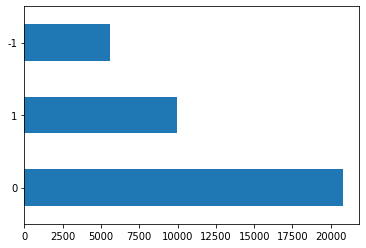

In [17]:
france_tweets_df['Label'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

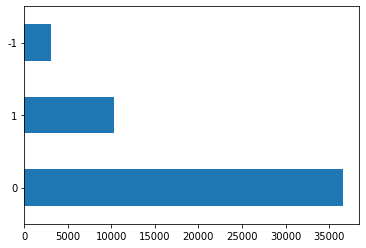

In [18]:
iran_tweets_df['Label'].value_counts().plot(kind = 'barh')

**Remove Neutral Tweets**

In [19]:
france_tweets_df = france_tweets_df.loc[france_tweets_df["Label"] != -1 ]

In [20]:
iran_tweets_df = iran_tweets_df.loc[iran_tweets_df["Label"] != -1 ]

In [21]:
france_tweets_df

,Datetime,Tweet Id,Text,Username,Label
0,2022-04-02 22:31:59+00:00,1510384575511474180,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0
1,2022-04-02 18:20:52+00:00,1510321381241946114,While the French are busy fighting Muslim girl...,malik_in_dc,0
2,2022-04-02 18:16:53+00:00,1510320380405329920,@itgirlenergy It's true but we finally getting...,stephens_hands,1
3,2022-04-02 12:53:01+00:00,1510238876257947648,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0
4,2022-04-02 11:50:45+00:00,1510223203846737927,@hibaelmoctar This is great he shut the wester...,Morty_is_paki,1
...,...,...,...,...,...
36375,2011-01-19 21:06:12+00:00,27834230662762496,@shonahalligan I'm not french! Ruth was chatti...,JoshyP92,0
36378,2011-01-14 15:12:42+00:00,25933332449599488,@Number10gov Can u put a good word in 4 the hi...,MrsBasaran,1
36379,2011-01-10 18:36:35+00:00,24535087332724737,2 faces of west.pope can c blasphemy law in pa...,X_two_,1
36382,2011-01-07 04:01:50+00:00,23227784927125504,@Mohomed @thisisrio2 oh he wants to go to hija...,ThatDolma,0


In [ ]:
france_tweets_df.drop_duplicates(subset=['Text', 'Username'])

,Datetime,Tweet Id,Text,Username,Label,Cleaned_List,Cleaned_Text
0,2022-04-02 22:31:59+00:00,1510384575511474180,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0,"[jaktare, takavic, gene, shibumi4india, indias...",jaktare takavic gene shibumi4india indiaspeaks...
1,2022-04-02 18:20:52+00:00,1510321381241946114,While the French are busy fighting Muslim girl...,malik_in_dc,0,"[french, busy, fighting, muslim, girl, hijab, ...",french busy fighting muslim girl hijab country...
2,2022-04-02 18:16:53+00:00,1510320380405329920,@itgirlenergy It's true but we finally getting...,stephens_hands,1,"[itgirlenergy, true, finally, getting, hijabi,...",itgirlenergy true finally getting hijabi vogue...
3,2022-04-02 12:53:01+00:00,1510238876257947648,@Jaktare @takavic_gene @Shibumi4India @IndiaSp...,Ballzheimers,0,"[jaktare, takavic, gene, shibumi4india, indias...",jaktare takavic gene shibumi4india indiaspeaks...
4,2022-04-02 11:50:45+00:00,1510223203846737927,@hibaelmoctar This is great he shut the wester...,Morty_is_paki,1,"[hibaelmoctar, great, shut, western, female, d...",hibaelmoctar great shut western female dog fem...
...,...,...,...,...,...,...,...
36375,2011-01-19 21:06:12+00:00,27834230662762496,@shonahalligan I'm not french! Ruth was chatti...,JoshyP92,0,"[shonahalligan, im, french, ruth, wa, chatting...",shonahalligan im french ruth wa chatting shit ...
36378,2011-01-14 15:12:42+00:00,25933332449599488,@Number10gov Can u put a good word in 4 the hi...,MrsBasaran,1,"[number10gov, u, put, good, word, 4, hijab, we...",number10gov u put good word 4 hijab wearing po...
36379,2011-01-10 18:36:35+00:00,24535087332724737,2 faces of west.pope can c blasphemy law in pa...,X_two_,1,"[2, face, west, pope, c, blasphemy, law, pak, ...",2 face west pope c blasphemy law pak cant c fr...
36382,2011-01-07 04:01:50+00:00,23227784927125504,@Mohomed @thisisrio2 oh he wants to go to hija...,ThatDolma,0,"[mohomed, thisisrio2, oh, want, go, hijab, ban...",mohomed thisisrio2 oh want go hijab banned fra...


In [22]:
iran_tweets_df

,Datetime,Tweet Id,Text,Username,Label
0,2022-11-02 23:55:27+00:00,1587956586223378434,@NazaninNour we women of Iran are not protesti...,Luckyluke7958,0
1,2022-11-02 23:53:21+00:00,1587956057304727552,Biggest BS on social media how different is it...,baburajvarma,0
2,2022-11-02 23:46:26+00:00,1587954315687329792,@EvieFangOCPC @freed_panda @mhdksafa Have you ...,msbuttaface,0
3,2022-11-02 23:45:48+00:00,1587954155603238913,@AbasAslani Salaam and thank you for your repo...,AtefehKhanoom,1
4,2022-11-02 23:23:48+00:00,1587948618748956672,Hijab is not a cultural issue in Iran. It neve...,BenyaminZargar,1
...,...,...,...,...,...
49996,2022-09-23 18:16:09+00:00,1573375682394357760,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0
49997,2022-09-23 18:16:08+00:00,1573375678523002880,The Iranian government is burning the holy Qur...,Nerida_mer,0
49998,2022-09-23 18:16:01+00:00,1573375650580267008,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0
49999,2022-09-23 18:15:53+00:00,1573375614698098688,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0


In [23]:
iran_tweets_df = iran_tweets_df.drop_duplicates(subset=['Text', 'Username'])

In [ ]:
iran_tweets_df

,Datetime,Tweet Id,Text,Username,Label,Cleaned_List,Cleaned_Text
0,2022-11-02 23:55:27+00:00,1587956586223378434,@NazaninNour we women of Iran are not protesti...,Luckyluke7958,0,"[nazaninnour, woman, iran, protesting, scarf, ...",nazaninnour woman iran protesting scarf protes...
1,2022-11-02 23:53:21+00:00,1587956057304727552,Biggest BS on social media how different is it...,baburajvarma,0,"[biggest, b, social, medium, different, forcin...",biggest b social medium different forcing hija...
2,2022-11-02 23:46:26+00:00,1587954315687329792,@EvieFangOCPC @freed_panda @mhdksafa Have you ...,msbuttaface,0,"[eviefangocpc, freed, panda, mhdksafa, paid, a...",eviefangocpc freed panda mhdksafa paid attenti...
3,2022-11-02 23:45:48+00:00,1587954155603238913,@AbasAslani Salaam and thank you for your repo...,AtefehKhanoom,1,"[abasaslani, salaam, thank, reporting, aghayeh...",abasaslani salaam thank reporting aghayeh asla...
4,2022-11-02 23:23:48+00:00,1587948618748956672,Hijab is not a cultural issue in Iran. It neve...,BenyaminZargar,1,"[hijab, cultural, issue, iran, never, wa, neve...",hijab cultural issue iran never wa never islam...
...,...,...,...,...,...,...,...
49996,2022-09-23 18:16:09+00:00,1573375682394357760,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0,"[mhluvou, brutal, murder, twenty, two, yo, ira...",mhluvou brutal murder twenty two yo iranian wo...
49997,2022-09-23 18:16:08+00:00,1573375678523002880,The Iranian government is burning the holy Qur...,Nerida_mer,0,"[iranian, government, burning, holy, quran, ri...",iranian government burning holy quran ripping ...
49998,2022-09-23 18:16:01+00:00,1573375650580267008,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0,"[mhluvou, brutal, murder, twenty, two, yo, ira...",mhluvou brutal murder twenty two yo iranian wo...
49999,2022-09-23 18:15:53+00:00,1573375614698098688,@mhluvou The brutal murder of a twenty two yo ...,loui_lovel,0,"[mhluvou, brutal, murder, twenty, two, yo, ira...",mhluvou brutal murder twenty two yo iranian wo...


**Display Updated Bar Plots Without Neutral Tweets**

<AxesSubplot:>

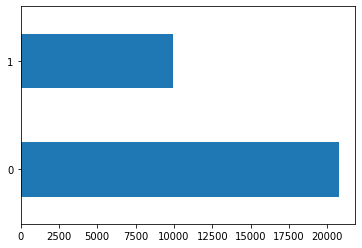

In [24]:
france_tweets_df['Label'].value_counts().plot(kind = 'barh')

In [25]:
france_tweets_df['Label'].value_counts()

0    20798
1     9968
Name: Label, dtype: int64

In [26]:
(france_tweets_df['Label'].value_counts()/len(france_tweets_df))*100

0    67.600598
1    32.399402
Name: Label, dtype: float64

<AxesSubplot:>

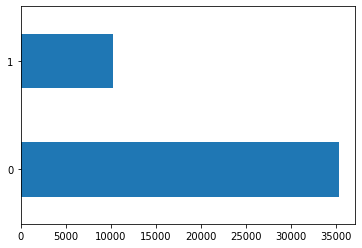

In [27]:
iran_tweets_df['Label'].value_counts().plot(kind = 'barh')

In [28]:
(iran_tweets_df['Label'].value_counts()/len(iran_tweets_df))*100

0    77.567206
1    22.432794
Name: Label, dtype: float64

In [29]:

def preprocess(text):

    stopwords = set(nltk.corpus.stopwords.words('english'))
    lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()
    
    # make text lowercase
    text = text.lower()

    # handle urls
    text = re.sub('http://t.co/\w{10}|https://t.co/\w{10}', ' ', text)

    # handle ('s)
    text1 = re.sub(r"'s", '', text)

    # handle apostrophes (')
    text2 = re.sub(r"'", '', text1)

    # break on any non-alphanumeric character
    text3 = re.sub(r"[^a-z0-9]", ' ', text2)

    # tokenize the text
    tokens = nltk.word_tokenize(text3)

    # lemmatize the tokens
    lemmatized_tokens = list(map(lambda token: str(lemmatizer.lemmatize(token)), tokens))

    # remove stopwords
    clean_tokens = [token for token in lemmatized_tokens if not token in stopwords]

    return clean_tokens



In [30]:
cleaned_list_of_list = []
cleaned_text_list = []
size = france_tweets_df.shape[0]   
for i in range(size):       
  oldtext = france_tweets_df.iloc[i]['Text']
  x = preprocess(oldtext)
  cleaned_list_of_list.append(x)
  text = ' '.join(x)
  cleaned_text_list.append(text)

france_tweets_df['Cleaned_List'] = cleaned_list_of_list
france_tweets_df['Cleaned_Text'] = cleaned_text_list

C:\Users\imaaz\AppData\Local\Temp\ipykernel_41196\1216622478.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_tweets_df['Cleaned_List'] = cleaned_list_of_list
C:\Users\imaaz\AppData\Local\Temp\ipykernel_41196\1216622478.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_tweets_df['Cleaned_Text'] = cleaned_text_list


In [31]:
cleaned_list_of_list = []
cleaned_text_list = []
size = iran_tweets_df.shape[0]   
for i in range(size):       
  oldtext = iran_tweets_df.iloc[i]['Text']
  x = preprocess(oldtext)
  cleaned_list_of_list.append(x)
  text = ' '.join(x)
  cleaned_text_list.append(text)

iran_tweets_df['Cleaned_List'] = cleaned_list_of_list
iran_tweets_df['Cleaned_Text'] = cleaned_text_list

C:\Users\imaaz\AppData\Local\Temp\ipykernel_41196\1567209419.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iran_tweets_df['Cleaned_List'] = cleaned_list_of_list
C:\Users\imaaz\AppData\Local\Temp\ipykernel_41196\1567209419.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iran_tweets_df['Cleaned_Text'] = cleaned_text_list


In [32]:
france_tweets_df.iloc[1]['Cleaned_List']
france_tweets_df.iloc[1]['Cleaned_Text']

'french busy fighting muslim girl hijab country birthplace liberal humanism turning bastion right wing pseudo racist bigotry'

In [33]:
iran_tweets_df.iloc[0]['Cleaned_List']
iran_tweets_df.iloc[0]['Cleaned_Text']


'nazaninnour woman iran protesting scarf protesting ideology abandoning right protest hijab restricting freedom murdering people stealing resource living like hostage need iran free extremism'

In [34]:
iran_tweets_df['Cleaned_List']

0        [nazaninnour, woman, iran, protesting, scarf, ...
1        [biggest, b, social, medium, different, forcin...
2        [eviefangocpc, freed, panda, mhdksafa, paid, a...
3        [abasaslani, salaam, thank, reporting, aghayeh...
4        [hijab, cultural, issue, iran, never, wa, neve...
                               ...                        
49996    [mhluvou, brutal, murder, twenty, two, yo, ira...
49997    [iranian, government, burning, holy, quran, ri...
49998    [mhluvou, brutal, murder, twenty, two, yo, ira...
49999    [mhluvou, brutal, murder, twenty, two, yo, ira...
50000    [mhluvou, brutal, murder, twenty, two, yo, ira...
Name: Cleaned_List, Length: 45643, dtype: object

**Running Models on France Tweets**

**1) Baseline Model: Multinomial Naive Bayes**

In [35]:
france_labels = france_tweets_df['Label']
france_X_train, france_X_test, france_y_train, france_y_test = train_test_split(france_tweets_df['Cleaned_Text'], france_labels, test_size=0.3, random_state=42)
france_X_train = france_X_train.astype('U').values
france_X_test = france_X_test.astype('U').values

count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(france_X_train) 
count_test = count_vectorizer.transform(france_X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(france_X_train) 
tfidf_test = tfidf_vectorizer.transform(france_X_test)

In [36]:
clf = MultinomialNB()  #this is the Naive bayes modelling

clf.fit(count_train, france_y_train)
pred = clf.predict(count_test)
score = accuracy_score(france_y_test, pred)
f1 = f1_score(france_y_test, pred, average='binary')
print ('Accuracy:  %0.3f' % accuracy_score(france_y_test, pred))
print ('F1 score:  %0.3f' % f1_score(france_y_test, pred, average='macro'))
print ('Recall:    %0.3f' % recall_score(france_y_test, pred, average='macro'))
print ('Precision: %0.3f' % precision_score(france_y_test, pred, average='macro'))

Accuracy:  0.812
F1 score:  0.765
Recall:    0.748
Precision: 0.800


**2) Support Vector Machine (SVM)**

In [37]:
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(tfidf_train,france_y_train)
pred = SVM.predict(tfidf_test)

print ('Accuracy:  %0.3f' % accuracy_score(france_y_test, pred))
print ('F1 score:  %0.3f' % f1_score(france_y_test, pred, average='macro'))
print ('Recall:    %0.3f' % recall_score(france_y_test, pred, average='macro'))
print ('Precision: %0.3f' % precision_score(france_y_test, pred, average='macro'))

Accuracy:  0.856
F1 score:  0.828
Recall:    0.817
Precision: 0.843


**LSTM Classifier**

The LSTM Classifier is inspired by the following link
https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948


In [ ]:
words = france_tweets_df.iloc[:]['Cleaned_List'].tolist()

In [ ]:
all_words=[]
for i in words:
  all_words += i

In [ ]:
count_words = Counter(all_words)

In [ ]:
total_words = len(all_words)
sorted_words = count_words.most_common(total_words)

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [ ]:
print(vocab_to_int)

In [ ]:
tweets_split = france_tweets_df.iloc[:]['Cleaned_Text'].tolist()

In [ ]:
tweets_int = []
for tweet in tweets_split:
    t = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(t)
print (tweets_int[0:3])

[[10155, 10156, 8016, 10157, 10158, 261, 10159, 15034, 31, 407, 351, 958, 68, 311, 54, 112, 120, 114, 718, 2, 2029, 36, 1389, 10, 103, 9, 1, 58, 58], [3, 2512, 335, 6, 25, 1, 10, 10160, 254, 15035, 2513, 3339, 12, 923, 3189, 100, 883], [15036, 312, 991, 377, 42, 959, 2, 11, 1442]]


In [ ]:
labels_split = france_tweets_df.iloc[:]['Label'].tolist()

count    30766.000000
mean        17.091205
std          7.772463
min          2.000000
25%         11.000000
50%         15.000000
75%         23.000000
max         87.000000
dtype: float64

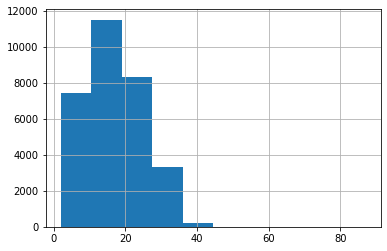

In [ ]:
tweets_len = [len(x) for x in tweets_int]
pd.Series(tweets_len).hist()
pd.Series(tweets_len).describe()

In [ ]:
tweets_int = [tweets_int[i] for i, l in enumerate(tweets_len) if l>0 ]
labels_split = [labels_split[i] for i, l in enumerate(tweets_len) if l> 0 ]

In [ ]:
features = pad_features(tweets_int, 30)

In [ ]:
len_feat = len(features)

In [ ]:
labels_split = np.array(labels_split)
split_frac = 0.8

In [ ]:
train_x = features[0:int(split_frac*len_feat)]
train_y = labels_split[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = labels_split[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[    0,     0,     0,  ...,   796,   208,     1],
        [    0,     0,     0,  ...,     3,   269,     2],
        [    0,     0,     0,  ...,   375,     2,   930],
        ...,
        [    0,     0,     0,  ...,     2,    53,  2681],
        [  884,  1004, 26952,  ...,  4014,   164,    26],
        [    0,     0,     0,  ...,  1175,  1009,   752]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0])


In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(39876, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 5 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
          
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                
                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/5... Step: 100... Loss: 0.089119... Val Loss: 0.807771
Epoch: 1/5... Step: 200... Loss: 0.006949... Val Loss: 0.847586
Epoch: 1/5... Step: 300... Loss: 0.011968... Val Loss: 0.862222
Epoch: 1/5... Step: 400... Loss: 0.027679... Val Loss: 0.870197
Epoch: 2/5... Step: 500... Loss: 0.019135... Val Loss: 0.804624
Epoch: 2/5... Step: 600... Loss: 0.006427... Val Loss: 0.965559
Epoch: 2/5... Step: 700... Loss: 0.009143... Val Loss: 0.965944
Epoch: 2/5... Step: 800... Loss: 0.052481... Val Loss: 1.017847
Epoch: 2/5... Step: 900... Loss: 0.010671... Val Loss: 1.053834
Epoch: 3/5... Step: 1000... Loss: 0.026325... Val Loss: 1.131342
Epoch: 3/5... Step: 1100... Loss: 0.000598... Val Loss: 1.061130
Epoch: 3/5... Step: 1200... Loss: 0.008778... Val Loss: 1.005851
Epoch: 3/5... Step: 1300... Loss: 0.114802... Val Loss: 1.009028
Epoch: 3/5... Step: 1400... Loss: 0.021281... Val Loss: 0.871418
Epoch: 4/5... Step: 1500... Loss: 0.002145... Val Loss: 0.865509
Epoch: 4/5... Step: 1600... Loss: 

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    num_correct += np.sum(correct)


print("Test loss: {:.3f}".format(np.mean(test_losses)))

test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.341
Test accuracy: 0.669


**Running Models on Iran Tweets**

**1) Baseline Model: Multinomial Naive Bayes**

In [ ]:
iran_labels = iran_tweets_df['Label']
iran_X_train, iran_X_test, iran_y_train, iran_y_test = train_test_split(iran_tweets_df['Cleaned_Text'], iran_labels, test_size=0.3, random_state=42)
iran_X_train = iran_X_train.astype('U').values
iran_X_test = iran_X_test.astype('U').values

count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(iran_X_train) 
count_test = count_vectorizer.transform(iran_X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(iran_X_train) 
tfidf_test = tfidf_vectorizer.transform(iran_X_test)

In [ ]:
clf = MultinomialNB()  #this is the Naive bayes modelling

clf.fit(count_train, iran_y_train)
pred = clf.predict(count_test)
score = accuracy_score(iran_y_test, pred)
f1 = f1_score(iran_y_test, pred, average='binary')
print ('Accuracy:  %0.3f' % accuracy_score(iran_y_test, pred))
print ('F1 score:  %0.3f' % f1_score(iran_y_test, pred, average='macro'))
print ('Recall:    %0.3f' % recall_score(iran_y_test, pred, average='macro'))
print ('Precision: %0.3f' % precision_score(iran_y_test, pred, average='macro'))

Accuracy:  0.763
F1 score:  0.724
Recall:    0.803
Precision: 0.716


**2) Support Vector Machine (SVM)**

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(tfidf_train,iran_y_train)
pred = SVM.predict(tfidf_test)

print ('Accuracy:  %0.3f' % accuracy_score(iran_y_test, pred))
print ('F1 score:  %0.3f' % f1_score(iran_y_test, pred, average='macro'))
print ('Recall:    %0.3f' % recall_score(iran_y_test, pred, average='macro'))
print ('Precision: %0.3f' % precision_score(iran_y_test, pred, average='macro'))

Accuracy:  0.905
F1 score:  0.857
Recall:    0.843
Precision: 0.873


In [ ]:
import keras
from sklearn import preprocessing
from keras import Sequential
from keras.layers import Dense, Softmax
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import numpy as np

In [ ]:
y=france_tweets_df['Label']       #here we store the labels of the dataframe to be used later in y

MAIN_FILE_copy = france_tweets_df.copy()   

x_data = MAIN_FILE_copy['Cleaned_List']       

        
label_encoder = preprocessing.LabelEncoder()  
y_data = label_encoder.fit_transform(y)
 
encoder = Tokenizer()  
encoder.fit_on_texts(x_data) 
x_train = encoder.texts_to_sequences(x_data) 
total_words = len(encoder.word_index) + 1   

def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
MAX_SEQUENCE_LENGTH=get_max_length()

# MAX_SEQUENCE_LENGTH
x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, value=0, padding='post', truncating='post')

# print(x_train.shape)

# y_data.shape

embedding_vector_features = 256
VOCAB_SIZE=total_words
# VOCAB_SIZE

model1 = Sequential()
model1.add(Embedding(VOCAB_SIZE,embedding_vector_features,input_length=MAX_SEQUENCE_LENGTH))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
# model1.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
print(model1.summary())


# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) #this is used for early stopping when the generalization error starts to decrease

X_train, X_test, Y_train, Y_test = train_test_split(x_train,to_categorical(y_data), test_size=0.15, random_state=1)

# model1.fit(X_train,Y_train,validation_split=0.15,epochs=20,batch_size=128)
model1.fit(X_train,Y_train,epochs=10,batch_size=256)


predict_x1=model1.predict(X_test) 
classes_x1=np.argmax(predict_x1,axis=1)

print("Accuracy Score : ",accuracy_score(Y_test,to_categorical(classes_x1)))
print("Precision Score : ",precision_score(Y_test,to_categorical(classes_x1), 
                                           average='micro'))
print("Recall Score : ",recall_score(Y_test,to_categorical(classes_x1), 
                                           average='micro'))
print("F1 Score : ",f1_score(Y_test,to_categorical(classes_x1), 
                                           average='micro'))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 18, 256)           10208256  
                                                                 
 dropout_20 (Dropout)        (None, 18, 256)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               142800    
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                                 
Total params: 10,351,258
Trainable params: 10,351,258
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
103/103 [================

**LSTM classifier**

The LSTM Classifier is inspired by the following link
https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948


In [ ]:
words = iran_tweets_df.iloc[:]['Cleaned_List'].tolist()

In [ ]:
all_words=[]
for i in words:
  all_words += i

In [ ]:
count_words = Counter(all_words)


In [ ]:
print(count_words)

In [ ]:
total_words = len(all_words)
sorted_words = count_words.most_common(total_words)

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [ ]:
print (vocab_to_int)

In [ ]:
tweets_split = iran_tweets_df.iloc[:]['Cleaned_Text'].tolist()

In [ ]:
tweets_int = []
for tweet in tweets_split:
    t = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(t)
print (tweets_int[0:3])

[[1369, 3, 2, 56, 215, 56, 688, 17229, 38, 9, 1, 3584, 47, 289, 30, 3191, 2529, 165, 57, 1945, 70, 2, 100, 1838], [943, 559, 394, 147, 299, 230, 1, 17230, 17231, 545, 59, 231, 6478, 59, 343, 4781, 2, 2893, 2893], [17232, 3585, 12101, 612, 1023, 709, 102, 189, 2, 2290, 320, 595, 49, 80, 37, 5, 8, 2291, 50, 1263, 34, 2, 41, 31, 1]]


In [ ]:
labels_split = iran_tweets_df.iloc[:]['Label'].tolist()

count    45643.000000
mean        21.122867
std          6.965245
min          3.000000
25%         16.000000
50%         22.000000
75%         26.000000
max         89.000000
dtype: float64

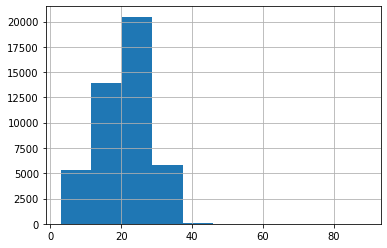

In [ ]:
tweets_len = [len(x) for x in tweets_int]
pd.Series(tweets_len).hist()
pd.Series(tweets_len).describe()

In [ ]:
tweets_int = [tweets_int[i] for i, l in enumerate(tweets_len) if l>0 ]
labels_split = [labels_split[i] for i, l in enumerate(tweets_len) if l> 0 ]

In [ ]:
def pad_features(tweets_int, seq_length):
    features = np.zeros((len(tweets_int), seq_length), dtype = int)
    
    for i, tweet in enumerate(tweets_int):
        tweet_len = len(tweet)
        
        if tweet_len <= seq_length:
            final = list(np.zeros(seq_length-tweet_len)) + tweet
        if tweet_len > seq_length:
            final = tweet[0:seq_length]
        
        features[i,:] = np.array(final)
    return features

In [ ]:
features = pad_features(tweets_int, 30)

In [ ]:
len_feat = len(features)

In [ ]:
labels_split = np.array(labels_split)
split_frac = 0.8

In [ ]:
train_x = features[0:int(split_frac*len_feat)]
train_y = labels_split[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = labels_split[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[   0,    0,    0,  ...,   61,    1,    2],
        [   0,    0,    0,  ...,    8,    1,   13],
        [   0,    0,    0,  ...,    6,   22,    1],
        ...,
        [   0,    0,    0,  ..., 1218,   61,    1],
        [   0,    0,    0,  ...,  242,  992,   64],
        [ 986, 2470,   16,  ...,    1, 2288,    2]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1])


In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(39277, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
          
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                
                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.307541... Val Loss: 0.284881
Epoch: 1/4... Step: 200... Loss: 0.384841... Val Loss: 0.222723
Epoch: 1/4... Step: 300... Loss: 0.305224... Val Loss: 0.225170
Epoch: 1/4... Step: 400... Loss: 0.255924... Val Loss: 0.203279
Epoch: 1/4... Step: 500... Loss: 0.143513... Val Loss: 0.186928
Epoch: 1/4... Step: 600... Loss: 0.223067... Val Loss: 0.176927
Epoch: 1/4... Step: 700... Loss: 0.357101... Val Loss: 0.176385
Epoch: 2/4... Step: 800... Loss: 0.148030... Val Loss: 0.193056
Epoch: 2/4... Step: 900... Loss: 0.254959... Val Loss: 0.186279
Epoch: 2/4... Step: 1000... Loss: 0.285703... Val Loss: 0.176976
Epoch: 2/4... Step: 1100... Loss: 0.243520... Val Loss: 0.172181
Epoch: 2/4... Step: 1200... Loss: 0.172536... Val Loss: 0.177232
Epoch: 2/4... Step: 1300... Loss: 0.287967... Val Loss: 0.177781
Epoch: 2/4... Step: 1400... Loss: 0.211402... Val Loss: 0.166205
Epoch: 3/4... Step: 1500... Loss: 0.202412... Val Loss: 0.199175
Epoch: 3/4... Step: 1600... Loss: 

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.250
Test accuracy: 0.933


In [ ]:
model3 = Sequential()
model3.add(Embedding(total_words,
                    embedding_size,
                    input_length=30))
model3.add(LSTM(64))
model3.add(Dense(100))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

mc_lstm= ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)  

lstm_history=model3.fit(x_train, to_categorical(y_train), epochs=5, validation_split=0.05, callbacks=[es,mc_lstm])

loss, acc = model3.evaluate(x_test, to_categorical(y_test))
print("Test accuracy: %0.2f%%"%(acc*100))

NameError: ignored